In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib #pour sauvergarder la normalisation
import pickle


In [8]:
#Chargement des données
donnees = pd.read_csv(r'Rice_Cammeo_Osmancik.csv')

In [9]:
#Séparation des caractéristiques (X) et les étiquettes (y)
X = donnees.drop('Class', axis=1)
y = donnees['Class']

In [10]:
#la normalisation
Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

#sauvegarde
joblib.dump(Norm,'Normalisation.pkl')

['Normalisation.pkl']

In [11]:
#Encodage des étiquettes pour les transformer en valeurs numériques
Encode = LabelEncoder()
y_Encode = Encode.fit_transform(y)

In [12]:
#création du model de réseau de neurones
model = Sequential()

#Ajout de la première couche cachée avec 64 neurones et la fonction d'activation 'relu'
model.add(Dense(64, activation='relu'))
#Ajout de la deuxième couche cachée avec 32 neurones et la fonction d'activation 'relu'
model.add(Dense(32, activation='relu'))
#Ajout de la couche de sortie avec autant de neurones que de classes, activation 'softmax' pour la classification multicatégorielle
model.add(Dense(len(Encode.classes_), activation='softmax'))

2024-09-08 15:24:12.347542: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
#Compilation du modèle avec la fonction de perte, l'optimiseur, et la métrique d'évaluation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#Entraînement du modèle avec les données normalisées, 50 époques, taille de batch de 32, et 20% des données pour la validation
entrainement_model = model.fit(X_Norm, y_Encode, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
96/96 [==============================] - 3s 20ms/step - loss: 0.5149 - accuracy: 0.7589 - val_loss: 0.4156 - val_accuracy: 0.8517
Epoch 2/50
96/96 [==============================] - 2s 17ms/step - loss: 0.2794 - accuracy: 0.9035 - val_loss: 0.3351 - val_accuracy: 0.8714
Epoch 3/50
96/96 [==============================] - 1s 15ms/step - loss: 0.2118 - accuracy: 0.9199 - val_loss: 0.3202 - val_accuracy: 0.8648
Epoch 4/50
96/96 [==============================] - 1s 14ms/step - loss: 0.1922 - accuracy: 0.9285 - val_loss: 0.1978 - val_accuracy: 0.9291
Epoch 5/50
96/96 [==============================] - 1s 12ms/step - loss: 0.1876 - accuracy: 0.9295 - val_loss: 0.2383 - val_accuracy: 0.8963
Epoch 6/50
96/96 [==============================] - 2s 16ms/step - loss: 0.1884 - accuracy: 0.9272 - val_loss: 0.2236 - val_accuracy: 0.9081
Epoch 7/50
96/96 [==============================] - 1s 10ms/step - loss: 0.1849 - accuracy: 0.9249 - val_loss: 0.2944 - val_accuracy: 0.8740
Epoch 8/50
96

In [15]:
#Affichage du résumé du modèle pour visualiser la structure des couches et des paramètres
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Extraction de la précision finale sur l'entraînement et la validation
train_accuracy = entrainement_model.history['accuracy'][-1] * 100
val_accuracy = entrainement_model.history['val_accuracy'][-1] * 100

print(f"\nPrécision finale sur l'entraînement : {train_accuracy:.2f}%")
print(f"Précision finale sur la validation : {val_accuracy:.2f}%")


Précision finale sur l'entraînement : 92.81%
Précision finale sur la validation : 90.16%


120/120 [==============================] - 1s 5ms/step


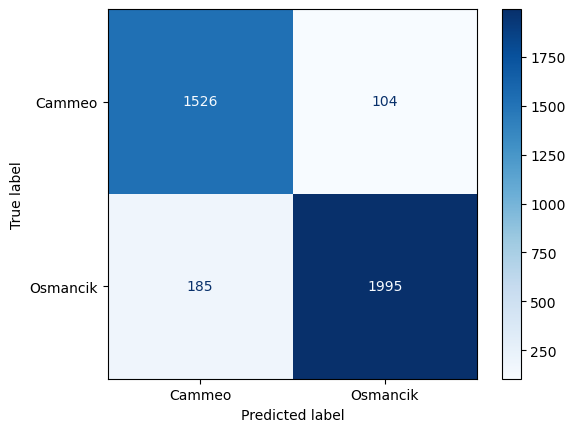

In [17]:
#Prédiction des classes pour les données normalisées
y_pred = model.predict(X_Norm)

#Conversion des prédictions en classes (indice de la classe ayant la plus grande probabilité)
y_pred_classes = np.argmax(y_pred, axis=1)

#Calcul et affichage de la matrice de confusion pour évaluer les performances du modèle
matrice = confusion_matrix(y_Encode, y_pred_classes)

#Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=matrice, display_labels=Encode.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
# Sauvegarder le modèle entraîné
# model.save("modele_classification.h5")
with open('model_rice.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !
